In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Open SCM data

In [28]:
#--- open SCM file
datapath = "../data.scm.original/"

#--- CGILS S12
cgils_case = "s12"
#cgils_case = "s11"

if (cgils_case == "s12"):
    filename_s12_am4 = datapath+"SCM_am4_xanadu_original.CGILS_ctl_s12_sflx_bulk.1x0m100d_1x1a1.atmos_cgils.nc"
    filename_s12_mynn = datapath+"SCM_am4_xanadu_edmf_mynn.CGILS_mynn_ED_ctl_s12_sflx_bulk.1x0m100d_1x1a.atmos_cgils.nc"
    filename_s12_edmf = datapath+"SCM_am4_xanadu_edmf_mynn.CGILS_mynn_edmf_ctl_s12_sflx_bulk.1x0m100d_1x1a.atmos_cgils.nc"
    legend = ["S12_AM4","S12_MYNN_ED","S12_MYNN_EDMF"]
    
elif (cgils_case == "s11"):
    filename_s12_am4 = datapath+"SCM_am4_xanadu_original.CGILS_ctl_s11_sflx_bulk.1x0m100d_1x1a1.atmos_cgils.nc"
    filename_s12_mynn = datapath+"SCM_am4_xanadu_edmf_mynn.CGILS_mynn_ED_ctl_s11_sflx_bulk.1x0m100d_1x1a.atmos_cgils.nc"
    filename_s12_edmf = datapath+"SCM_am4_xanadu_edmf_mynn.CGILS_mynn_edmf_ctl_s11_sflx_bulk.1x0m100d_1x1a.atmos_cgils.nc"
    legend = ["S11_AM4","S11_MYNN_ED","S11_MYNN_EDMF"]
    
da_s12_am4 = xr.open_dataset(filename_s12_am4)
da_s12_mynn = xr.open_dataset(filename_s12_mynn)
da_s12_edmf = xr.open_dataset(filename_s12_edmf)


## Compute mean

In [29]:
#varnames = ["LWP","shflx", "evap", "SWCRE"]
#varnames = ["shflx", "evap", "LWP", "SWCRE", "swup_toa_clr", "swup_toa"]
varnames = ["shflx", "evap", "LWP", "SWCRE", 'swdn_toa']

timeavg = "July_mean"
#timeavg = "last50"

dataset = "am4"
#dataset = "mynn"
#dataset = "edmf"

#--- timeavg
if (timeavg == "July_mean"):
    #--- July mean
    tt1=0
    tt2=1440

elif (timeavg == "last50"):
    #--- last 50 days
    tt1=2400
    tt2=4799

else:
    raise ValueError(f"unsupported timavg")

#--- dataset
if (dataset == "am4"):
    da_temp = da_s12_am4.copy()
elif (dataset == "mynn"):
    da_temp = da_s12_mynn.copy()
elif (dataset == "edmf"):
    da_temp = da_s12_mynn.copy()
else:
    raise ValueError(f"unsupported dataset")


print(cgils_case+", "+dataset+", "+timeavg)
    

#--- loop for variables
for varname in varnames:
    
    if (varname == "evap"):
        varA_scm1 = da_temp.get(varname)
        varA_scm1 = varA_scm1.copy()* 2.5e+6  # change unit to W/m2
        varA_scm1.attrs['units'] = "W/m2"
        varA_scm1.attrs['long_name'] = "Latent heat flux"
    
    elif (varname == "SWCRE"):
        varA_scm1 = da_temp.swup_toa_clr - da_temp.swup_toa

    elif (varname == "LWP"):
        varA_scm1 = da_temp.get(varname) 
        varA_scm1 = varA_scm1.copy()* 1000.  # change unit to g/m2
        varA_scm1.attrs['units'] = "g/m2"
        
    else:
        varA_scm1 = da_temp.get(varname)
    
    varA_scm1_avg = varA_scm1[tt1:tt2,0,0].mean("time")
    yhc.printv(varA_scm1_avg, varname)
    

#print(da_temp)

s12, am4, July_mean
 ------------- 
 shflx
<xarray.DataArray 'shflx' ()>
array(-7.1441793, dtype=float32)
Coordinates:
    lon      float64 231.0
    lat      float64 31.5
Attributes:
    long_name:      sensible heat flux
    units:          w/m2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

 ------------- 
 evap
<xarray.DataArray 'evap' ()>
array(19.804327, dtype=float32)
Coordinates:
    lon      float64 231.0
    lat      float64 31.5
Attributes:
    long_name:      Latent heat flux
    units:          W/m2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

 ------------- 
 LWP
<xarray.DataArray 'LWP' ()>
array(0.00039581, dtype=float32)
Coordinates:
    lon      float64 231.0
    lat      float64 31.5
Attributes:
    long_name:      Liquid water path
    units:          g/m2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

 ------------- 
 SWCRE
<xarray.DataArray ()>
array(

## plot

In [22]:
#==============================
def ax_def_xy (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- legend
    ax.legend(legend)
    
    #--- set x or y labels
    ax.set_xlabel("Time step")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_ylabel(var.attrs['long_name']+" ("+var.attrs['units']+")")
    
    #--- set x range
    ax.set_xlim([-100,len(var)])
    
#============================== 



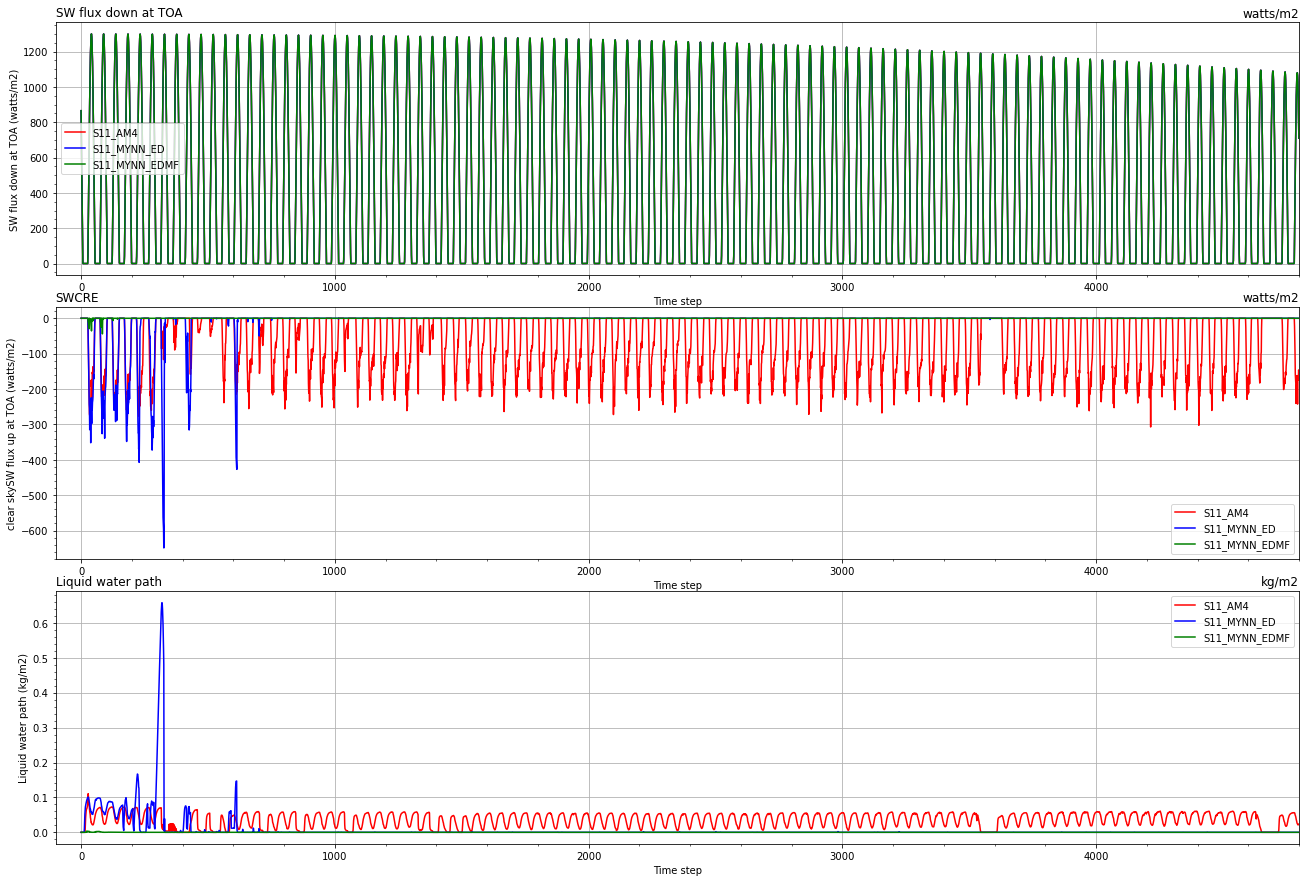

In [23]:
do_plot=True

if (do_plot):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18, 12))
    fig.tight_layout()

    style_scm1 = 'r-'
    style_scm2 = 'b-'
    style_scm3 = 'g-'
    
    #--- setting
    #tt = 3000   # time step
    #fig.suptitle("CGILS SCM")

    #--- ax1
    var1_scm1 = da_s12_am4.swdn_toa[:,0,0]
    var1_scm2 = da_s12_mynn.swdn_toa[:,0,0]
    var1_scm3 = da_s12_edmf.swdn_toa[:,0,0]
    
    #--- X-axis
    xx_scm = np.arange(0,len(var1_scm1.time))
    
    ax1.plot(xx_scm, var1_scm1, style_scm1,
             xx_scm, var1_scm2, style_scm2,
             xx_scm, var1_scm3, style_scm3,
             #xx_scm, var1_scm3, style_scm2,
             #xx_scm, var1_scm4, 'b--',
            )
    ax_def_xy(ax1, var1_scm1)

    #--- ax2, SWCRE
    var2_scm1 = da_s12_am4.swup_toa_clr[:,0,0] - da_s12_am4.swup_toa[:,0,0]
    var2_scm2 = da_s12_mynn.swup_toa_clr[:,0,0] - da_s12_mynn.swup_toa[:,0,0]
    var2_scm3 = da_s12_edmf.swup_toa_clr[:,0,0] - da_s12_edmf.swup_toa[:,0,0]
    
    ax2.plot(xx_scm, var2_scm1, style_scm1,
             xx_scm, var2_scm2, style_scm2,
             xx_scm, var2_scm3, style_scm3,
            )
    ax_def_xy(ax2, var2_scm1)
    ax2.set_title("SWCRE", loc='left')
    
    #--- ax3
    var3_scm1 = da_s12_am4.LWP[:,0,0]
    var3_scm2 = da_s12_mynn.LWP[:,0,0]
    var3_scm3 = da_s12_edmf.LWP[:,0,0]

    ax3.plot(xx_scm, var3_scm1, style_scm1,
             xx_scm, var3_scm2, style_scm2,
             xx_scm, var3_scm3, style_scm3,
            )
    ax_def_xy(ax3, var3_scm1)

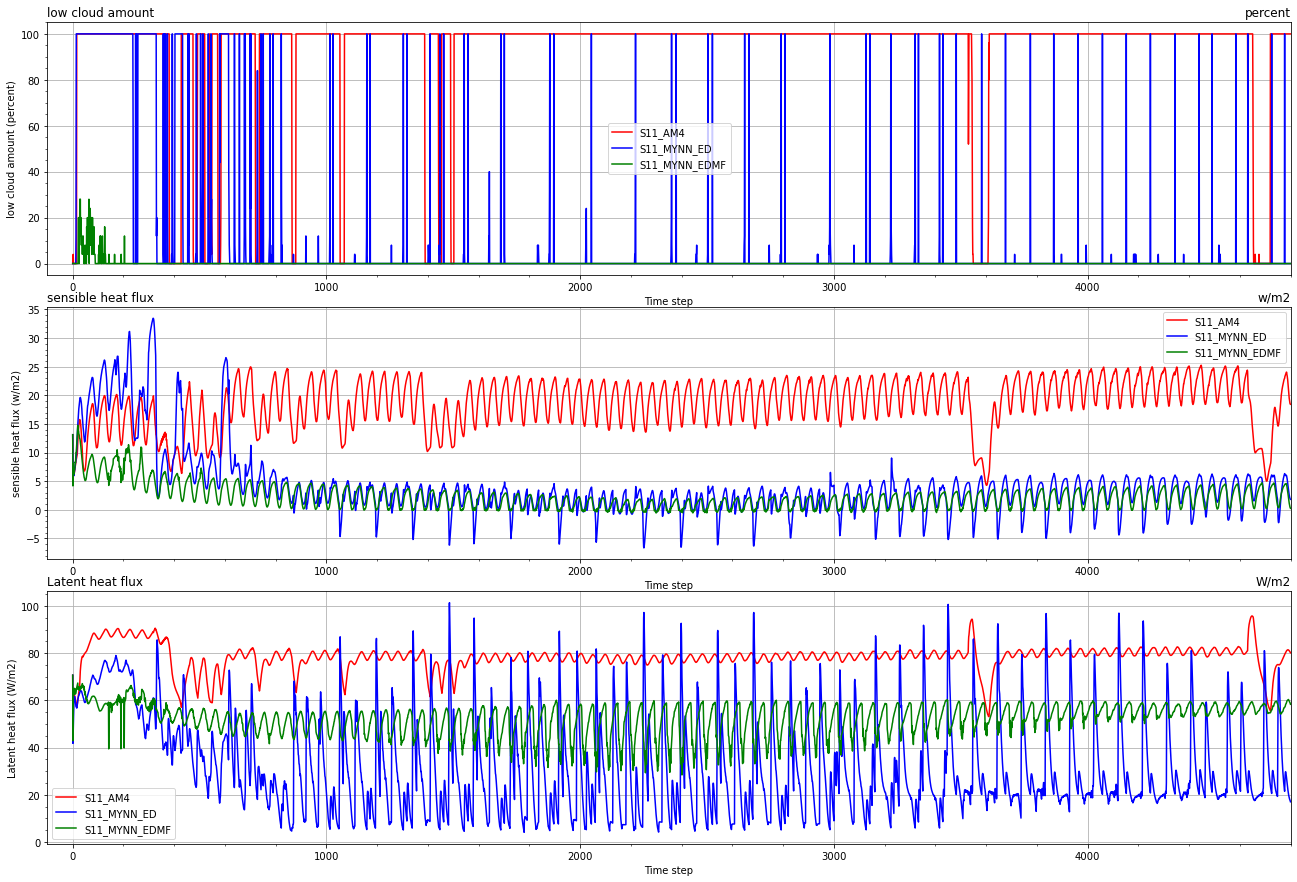

In [24]:
if (do_plot):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18, 12))
    fig.tight_layout()

    #--- setting
    #tt = 3000   # time step
    #fig.suptitle("CGILS SCM")

    #--- ax1
    var1_scm1 = da_s12_am4.low_cld_amt[:,0,0]
    var1_scm2 = da_s12_mynn.low_cld_amt[:,0,0]

    ax1.plot(xx_scm, da_s12_am4.low_cld_amt[:,0,0], style_scm1,
             xx_scm, da_s12_mynn.low_cld_amt[:,0,0], style_scm2,
             xx_scm, da_s12_edmf.low_cld_amt[:,0,0], style_scm3,
            )
    ax_def_xy(ax1, var1_scm1)

    #--- ax2
    var2_scm1 = da_s12_am4.shflx[:,0,0]
    var2_scm2 = da_s12_mynn.shflx[:,0,0]

    ax2.plot(xx_scm, var2_scm1, style_scm1,
             xx_scm, var2_scm2, style_scm2,
             xx_scm, da_s12_edmf.shflx[:,0,0], style_scm3,
            )
    ax_def_xy(ax2, var2_scm1)
    
    #--- ax3
    var3_scm1 = da_s12_am4.evap[:,0,0] * 2.5e+6  # change unit to W/m2
    var3_scm2 = da_s12_mynn.evap[:,0,0] * 2.5e+6
    var3_scm3 = da_s12_edmf.evap[:,0,0] * 2.5e+6
    var3_scm1.attrs['units'] = "W/m2"
    var3_scm1.attrs['long_name'] = "Latent heat flux"
    
    ax3.plot(xx_scm, var3_scm1, style_scm1,
             xx_scm, var3_scm2, style_scm2,
             xx_scm, var3_scm3, style_scm3,
            )
    ax_def_xy(ax3, var3_scm1)
    #ax3.set_title("LHFLx", loc='left')

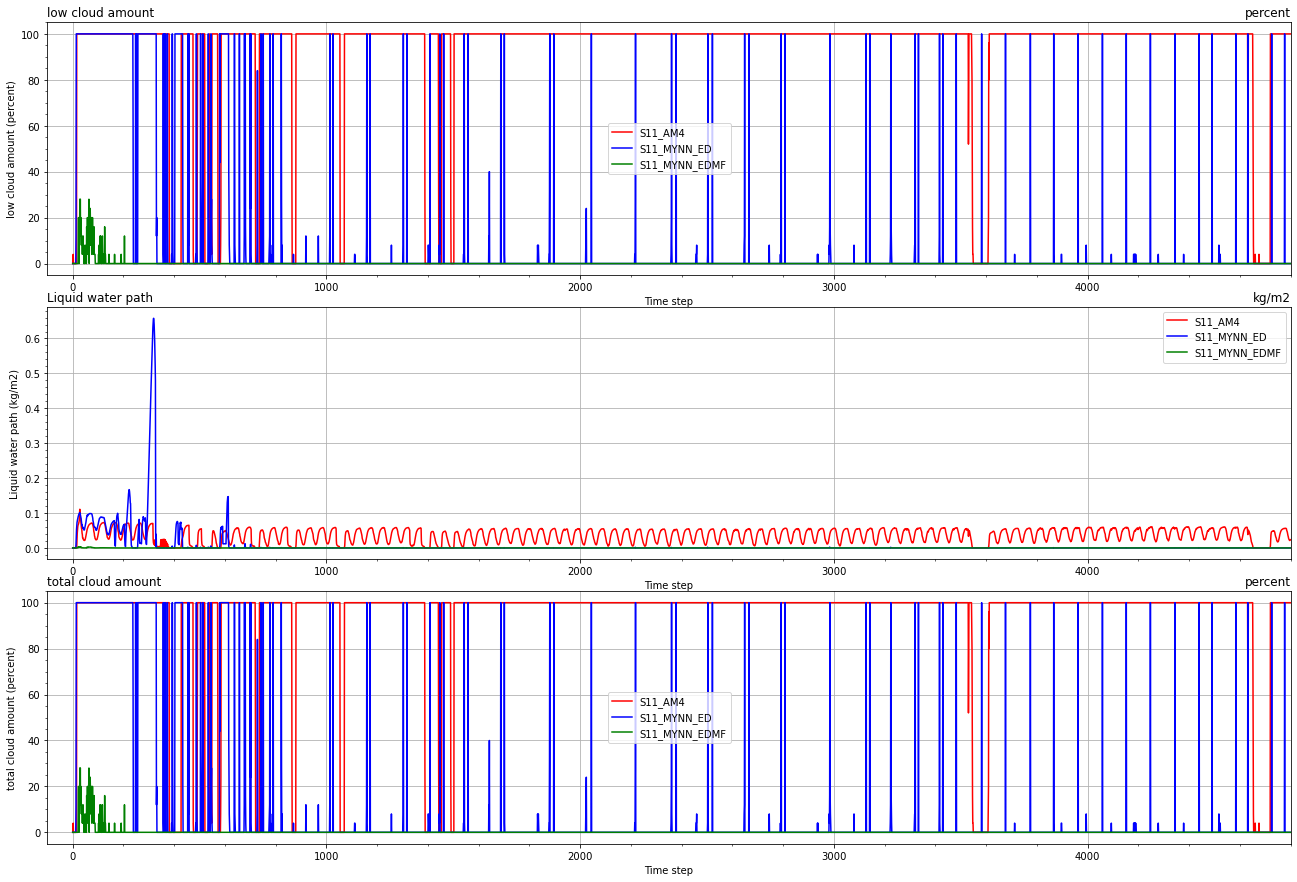

In [25]:
if (do_plot):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18, 12))
    fig.tight_layout()

    #--- setting
    #tt = 3000   # time step
    #fig.suptitle("CGILS SCM")

    #--- ax1
    var1_scm1 = da_s12_am4.low_cld_amt[:,0,0]
    var1_scm2 = da_s12_mynn.low_cld_amt[:,0,0]

    ax1.plot(xx_scm, var1_scm1, style_scm1,
             xx_scm, var1_scm2, style_scm2,
             xx_scm, da_s12_edmf.low_cld_amt[:,0,0], style_scm3,
            )
    ax_def_xy(ax1, var1_scm1)

    #--- ax2
    var2_scm1 = da_s12_am4.LWP[:,0,0]
    var2_scm2 = da_s12_mynn.LWP[:,0,0]

    ax2.plot(xx_scm, var2_scm1, style_scm1,
             xx_scm, var2_scm2, style_scm2,
             xx_scm, da_s12_edmf.LWP[:,0,0], style_scm3,
            )
    ax_def_xy(ax2, var2_scm1)
    
    #--- ax3
    var3_scm1 = da_s12_am4.tot_cld_amt[:,0,0] 
    var3_scm2 = da_s12_mynn.tot_cld_amt[:,0,0] 
   
    
    ax3.plot(xx_scm, var3_scm1, style_scm1,
             xx_scm, var3_scm2, style_scm2,
             xx_scm, da_s12_edmf.tot_cld_amt[:,0,0], style_scm3,
            )
    ax_def_xy(ax3, var3_scm1)
    #ax3.set_title("LHFLx", loc='left')